### Imports

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, LeakyReLU
from keras import regularizers
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
# Helper libraries
import numpy as np
import gc
import matplotlib.pyplot as plt
print(tf.__version__)

2.4.1


### Cleaning up

In [ ]:
def clean_up(model):
    keras.backend.clear_session()
    del model
    gc.collect()

### Plotting results

In [ ]:
def plot_history(hs, epochs, metric):
    print()
    plt.style.use('dark_background')
    plt.rcParams['figure.figsize'] = [15, 8]
    plt.rcParams['font.size'] = 16
    plt.clf()
    %tensorflow_version 1.x
    for label in hs:
        plt.plot(hs[label].history[metric], label='{0:s} train {1:s}'.format(label, metric))
        plt.plot(hs[label].history['val_{0:s}'.format(metric)], label='{0:s} validation {1:s}'.format(label, metric))
    x_ticks = np.arange(0, epochs + 1, epochs / 10)
    x_ticks [0] += 1
    plt.xticks(x_ticks)
    plt.ylim((0, 1))
    plt.xlabel('Epochs')
    plt.ylabel('Loss' if metric=='loss' else 'Accuracy')
    plt.legend()
    plt.show()

### Data manipulation

This uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels).
Loading the dataset returns four NumPy arrays:

1. The train_images and train_labels arrays are the training set—the data the      model uses to learn.

2. The model is tested against the test set, the test_images, and test_labels      arrays.



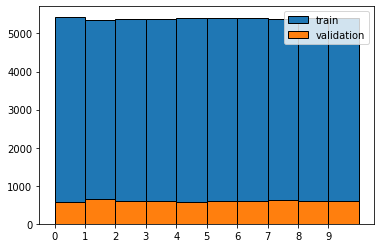

train images:54000
validation images:6000
test images:10000


(54000, 28, 28, 1)

In [ ]:
val_number=6000 #10% of the training dataset
classes = 10

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

val_images = train_images[:val_number]
val_labels = train_labels[:val_number]
train_images = train_images[val_number:]
train_labels = train_labels[val_number:]

plt.hist(train_labels, bins =[0,1,2,3,4,5,6,7,8,9,10],edgecolor = 'black',label='train')
plt.hist(val_labels, bins =[0,1,2,3,4,5,6,7,8,9,10],edgecolor = 'black',label='validation')
plt.legend(loc='upper right')
plt.xticks(range(10))
plt.show()

test_images = test_images.reshape(test_images.shape[0],28,28,1)
train_images = train_images.reshape(train_images.shape[0],28,28,1)
val_images = val_images.reshape(val_images.shape[0],28,28,1)

val_images= val_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images.astype('float32')

train_images = train_images / 255.0
test_images = test_images / 255.0
val_images = val_images /255.0

val_labels = np_utils.to_categorical(val_labels, classes)
test_labels = np_utils.to_categorical(test_labels, classes)
train_labels = np_utils.to_categorical(train_labels, classes)

print("train images:{}".format(train_images.shape[0]))
print("validation images:{}".format(val_images.shape[0]))
print("test images:{}".format(test_images.shape[0]))
train_images.shape

The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents.

Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Simple NN

In [ ]:
model = tf.keras.Sequential()
model.add(Flatten(input_shape=(28, 28,1)))
model.add(Dense(512, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


### Compile and fit

In [ ]:
epochs = 30
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.99, nesterov=False),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=epochs,validation_data=(val_images, val_labels))
evaluation = model.evaluate(test_images,  test_labels, verbose=2)
clean_up(model=model)

Epoch 1/30
1688/1688 [==============================] - 5s 2ms/step - loss: 0.8138 - accuracy: 0.7086 - val_loss: 0.4125 - val_accuracy: 0.8510
Epoch 2/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3981 - accuracy: 0.8542 - val_loss: 0.3520 - val_accuracy: 0.8710
Epoch 3/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3531 - accuracy: 0.8694 - val_loss: 0.3486 - val_accuracy: 0.8717
Epoch 4/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3280 - accuracy: 0.8785 - val_loss: 0.3259 - val_accuracy: 0.8797
Epoch 5/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3081 - accuracy: 0.8851 - val_loss: 0.3279 - val_accuracy: 0.8847
Epoch 6/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2921 - accuracy: 0.8895 - val_loss: 0.3146 - val_accuracy: 0.8850
Epoch 7/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2770 - accuracy: 0.8962 - val_loss: 0.3109 - val_accuracy:

### Results with simple NN

In [ ]:
print("Train Loss     : {0:.5f}".format(history.history['loss'][-1]))
print("Validation Loss: {0:.5f}".format(history.history['val_loss'][-1]))
print("Test Loss      : {0:.5f}".format(evaluation[0]))
print("---")
print("Train Accuracy     : {0:.5f}".format(history.history['accuracy'][-1]))
print("Validation Accuracy: {0:.5f}".format(history.history['val_accuracy'][-1]))
print("Test Accuracy      : {0:.5f}".format(evaluation[1]))

plot_history(hs={'Simple NN': history}, epochs=epochs, metric='loss')
plot_history(hs={'Simple NN': history}, epochs=epochs, metric='accuracy')

### CNN model without any regularization

In [ ]:
model = keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
      tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])
model.summary()

### Compile and fit

In [ ]:
epochs = 30
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=epochs,validation_data=(val_images, val_labels))
evaluation = model.evaluate(test_images,  test_labels, verbose=2)
clean_up(model=model)

### Results without any regularization

we observe high overfitting

In [ ]:
print("Train Loss     : {0:.5f}".format(history.history['loss'][-1]))
print("Validation Loss: {0:.5f}".format(history.history['val_loss'][-1]))
print("Test Loss      : {0:.5f}".format(evaluation[0]))
print("---")
print("Train Accuracy     : {0:.5f}".format(history.history['accuracy'][-1]))
print("Validation Accuracy: {0:.5f}".format(history.history['val_accuracy'][-1]))
print("Test Accuracy      : {0:.5f}".format(evaluation[1]))

plot_history(hs={'CNN no regularization': history}, epochs=epochs, metric='loss')
plot_history(hs={'CNN no regularization': history}, epochs=epochs, metric='accuracy')

### CNN with batch normalization and dropout

In [ ]:
model = tf.keras.Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', input_shape=(28,28,1), kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same',kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same',kernel_initializer='glorot_uniform'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same',kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu',kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu',kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax',kernel_initializer='glorot_uniform'))

model.summary()

### Compile and fit

In [ ]:
epochs = 50
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False),
              #optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=epochs,validation_data=(val_images, val_labels))

evaluation = model.evaluate(test_images,  test_labels, verbose=2)
clean_up(model=model)

### Results with batch normalization and dropout
there is still overfitting

In [ ]:
print("Train Loss     : {0:.5f}".format(history.history['loss'][-1]))
print("Validation Loss: {0:.5f}".format(history.history['val_loss'][-1]))
print("Test Loss      : {0:.5f}".format(evaluation[0]))
print("---")
print("Train Accuracy     : {0:.5f}".format(history.history['accuracy'][-1]))
print("Validation Accuracy: {0:.5f}".format(history.history['val_accuracy'][-1]))
print("Test Accuracy      : {0:.5f}".format(evaluation[1]))

plot_history(hs={'CNN batch_norm and dropout': history}, epochs=epochs, metric='loss')
plot_history(hs={'CNN batch_norm and dropout': history}, epochs=epochs, metric='accuracy')

### CNN with extra l2-regularization

In [ ]:
l2_hyperparameter = 0.001
l2=regularizers.l2(l2_hyperparameter)
model = keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),#kernel_regularizer=l2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),#kernel_regularizer=l2),
   tf.keras.layers.BatchNormalization(),
    Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'), #kernel_regularizer=l2),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    Dropout(0.25),
    
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'), #kernel_regularizer=l2),
    tf.keras.layers.BatchNormalization(),
    Dropout(0.25),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu',kernel_regularizer=l2),
    tf.keras.layers.BatchNormalization(),
    Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=l2),
    tf.keras.layers.BatchNormalization(),
    Dropout(0.5),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.summary()

### Compile and fit

In [ ]:
epochs = 30
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,mode='min',verbose=1)
history = model.fit(train_images, train_labels, epochs=epochs,validation_data=(val_images, val_labels),callbacks=[callback])

evaluation = model.evaluate(test_images,  test_labels, verbose=2)
clean_up(model=model)

Epoch 1/30
1688/1688 [==============================] - 21s 12ms/step - loss: 2.1482 - accuracy: 0.7544 - val_loss: 1.1598 - val_accuracy: 0.8858
Epoch 2/30
1688/1688 [==============================] - 19s 11ms/step - loss: 1.2268 - accuracy: 0.8630 - val_loss: 1.1171 - val_accuracy: 0.8910
Epoch 3/30
1688/1688 [==============================] - 19s 11ms/step - loss: 1.1599 - accuracy: 0.8774 - val_loss: 1.0920 - val_accuracy: 0.8978
Epoch 4/30
1688/1688 [==============================] - 19s 11ms/step - loss: 1.0957 - accuracy: 0.8825 - val_loss: 0.9588 - val_accuracy: 0.9028
Epoch 5/30
1688/1688 [==============================] - 19s 11ms/step - loss: 1.0454 - accuracy: 0.8864 - val_loss: 0.9149 - val_accuracy: 0.9153
Epoch 6/30
1688/1688 [==============================] - 19s 11ms/step - loss: 1.0225 - accuracy: 0.8920 - val_loss: 0.8937 - val_accuracy: 0.9100
Epoch 7/30
1688/1688 [==============================] - 19s 12ms/step - loss: 0.9642 - accuracy: 0.8962 - val_loss: 0.8587 -

### Results with extra l2-regularization

Train Loss     : 0.63443
Validation Loss: 0.61977
Test Loss      : 0.64357
---
Train Accuracy     : 0.92087
Validation Accuracy: 0.92700
Test Accuracy      : 0.92200

TensorFlow is already loaded. Please restart the runtime to change versions.


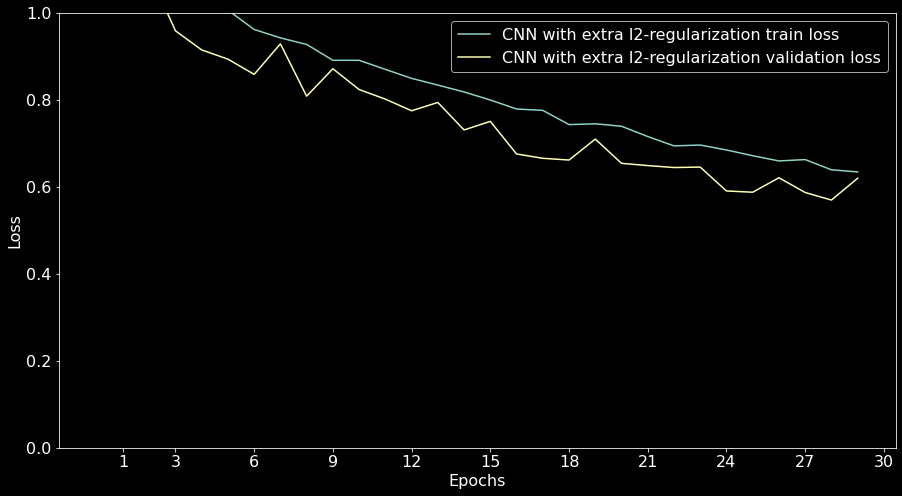


TensorFlow is already loaded. Please restart the runtime to change versions.


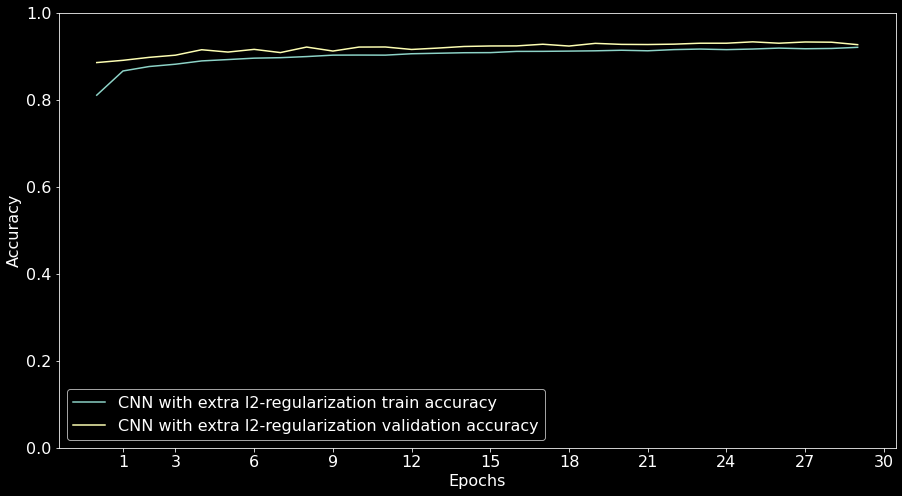

In [ ]:
print("Train Loss     : {0:.5f}".format(history.history['loss'][-1]))
print("Validation Loss: {0:.5f}".format(history.history['val_loss'][-1]))
print("Test Loss      : {0:.5f}".format(evaluation[0]))
print("---")
print("Train Accuracy     : {0:.5f}".format(history.history['accuracy'][-1]))
print("Validation Accuracy: {0:.5f}".format(history.history['val_accuracy'][-1]))
print("Test Accuracy      : {0:.5f}".format(evaluation[1]))

plot_history(hs={'CNN with extra l2-regularization': history}, epochs=epochs, metric='loss')
plot_history(hs={'CNN with extra l2-regularization': history}, epochs=epochs, metric='accuracy')

### Data Augmentation

In [ ]:
model = tf.keras.Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0

### Augmented data

In [ ]:
datagen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = datagen.flow(train_images, train_labels, batch_size=256)
val_batches = datagen.flow(val_images, val_labels, batch_size=256)

### Compile and fit

In [20]:
epochs = 40
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit_generator(batches, steps_per_epoch=54000 / 256, epochs=epochs,
                               validation_data = val_batches, validation_steps = 6000 / 256 )

evaluation = model.evaluate(test_images,  test_labels, verbose=2)
clean_up(model=model)

Epoch 1/40


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


210/210 [==============================] - 17s 76ms/step - loss: 1.0184 - accuracy: 0.6607 - val_loss: 2.7420 - val_accuracy: 0.2068
Epoch 2/40
210/210 [==============================] - 16s 74ms/step - loss: 0.5013 - accuracy: 0.8154 - val_loss: 2.9958 - val_accuracy: 0.3432
Epoch 3/40
210/210 [==============================] - 16s 74ms/step - loss: 0.4064 - accuracy: 0.8516 - val_loss: 0.4314 - val_accuracy: 0.8435
Epoch 4/40
210/210 [==============================] - 16s 74ms/step - loss: 0.3723 - accuracy: 0.8689 - val_loss: 0.3096 - val_accuracy: 0.8863
Epoch 5/40
210/210 [==============================] - 16s 74ms/step - loss: 0.3376 - accuracy: 0.8794 - val_loss: 0.3011 - val_accuracy: 0.8928
Epoch 6/40
210/210 [==============================] - 16s 74ms/step - loss: 0.3210 - accuracy: 0.8829 - val_loss: 0.2843 - val_accuracy: 0.8955
Epoch 7/40
210/210 [==============================] - 16s 74ms/step - loss: 0.3206 - accuracy: 0.8834 - val_loss: 0.2947 - val_accuracy: 0.8915
Epo

### Results with Data augmentation

Train Loss     : 0.17932
Validation Loss: 0.19011
Test Loss      : 0.19775
---
Train Accuracy     : 0.93346
Validation Accuracy: 0.93283
Test Accuracy      : 0.92960

TensorFlow is already loaded. Please restart the runtime to change versions.


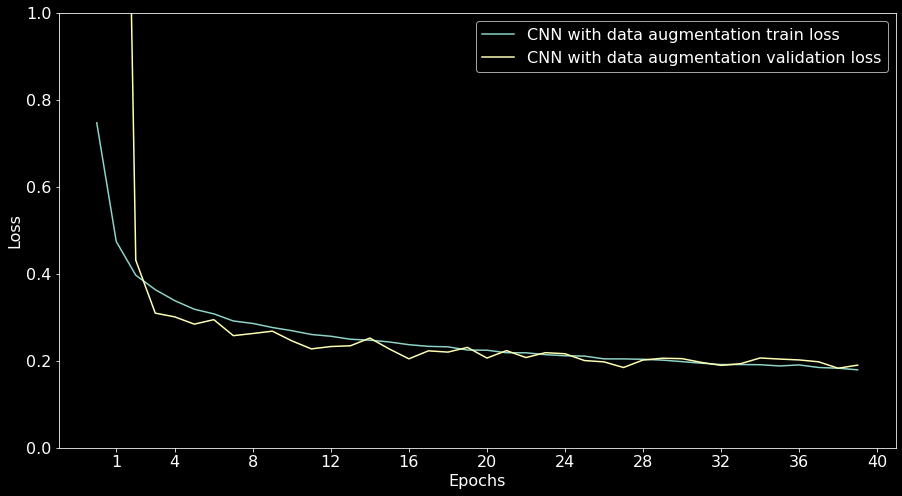


TensorFlow is already loaded. Please restart the runtime to change versions.


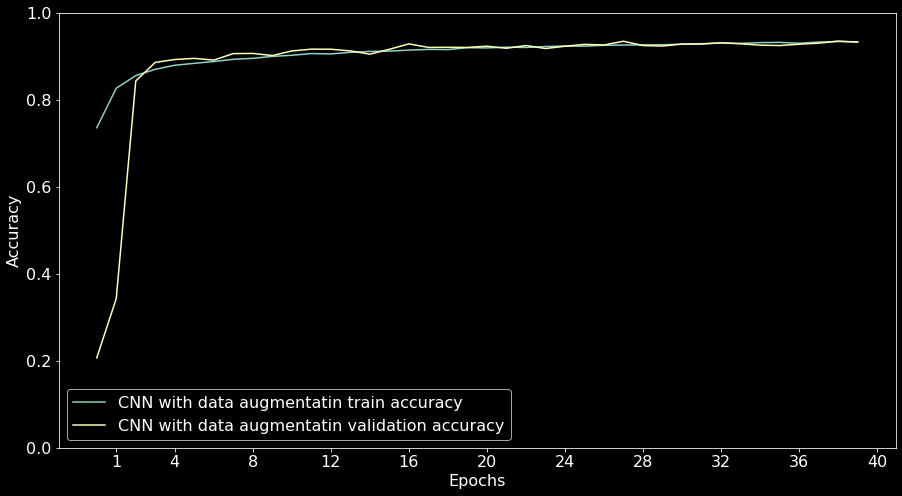

In [21]:
print("Train Loss     : {0:.5f}".format(history.history['loss'][-1]))
print("Validation Loss: {0:.5f}".format(history.history['val_loss'][-1]))
print("Test Loss      : {0:.5f}".format(evaluation[0]))
print("---")
print("Train Accuracy     : {0:.5f}".format(history.history['accuracy'][-1]))
print("Validation Accuracy: {0:.5f}".format(history.history['val_accuracy'][-1]))
print("Test Accuracy      : {0:.5f}".format(evaluation[1]))

plot_history(hs={'CNN with data augmentation': history}, epochs=epochs, metric='loss')
plot_history(hs={'CNN with data augmentatin': history}, epochs=epochs, metric='accuracy')

In [22]:
exit()